<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

This section for bouns, you might need to use some basic Machine Learning algorithms to answer some questions that in cases of regression, and classification. In this scope of this subject, highly recommend you use `scikit-learn` (instead of implement once again these algorithms)

<font color=lightgreen>**Context**</font>: In this section, OLS Linear Regression is chosen for machine learning

<font color=lightgreen>**Question**</font>: Training a model to predict GDP in specific country

<font color=lightgreen>**Overall**</font>: We will train 02 model and compare its MAE

## Import

In [1]:
# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

## Data preparation

Firstly, we will drop 02 columns (year and country) as well as drop "GDP in USD" column for y (prediction)

In [2]:
# YOUR CODE HERE (OPTION) 
ori_data = pd.read_csv("../data/processed/21127743_americas_processed.csv")
copy_data = ori_data.copy()

In [3]:
cols_at_end = ['GDP in USD']
copy_data = copy_data[[c for c in copy_data if c not in cols_at_end] 
        + [c for c in cols_at_end if c in copy_data]]

copy_data

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country,GDP in USD
0,93763.0,48981.0,44782.0,18.184992,6.828165,11.000000,20.153997,17.004881,8.655858,11.81121,...,63.452255,70.19852,76.07276,106.128710,39.528947,95.522408,97.105964,2022,Antigua and Barbuda,1.757604e+09
1,93219.0,48708.0,44511.0,12.115000,6.365000,11.000000,20.153997,17.004881,8.655858,11.81121,...,63.452255,75.77500,80.94100,106.128710,39.528947,95.522408,97.105964,2021,Antigua and Barbuda,1.560519e+09
2,92664.0,48428.0,44236.0,12.160000,5.961000,11.000000,20.153997,17.004881,8.655858,11.81121,...,63.452255,76.06100,81.31600,106.128710,39.528947,95.522408,97.105964,2020,Antigua and Barbuda,1.416348e+09
3,92117.0,48156.0,43961.0,11.485000,5.865000,11.000000,20.153997,17.004881,8.655858,11.81121,...,63.452255,75.90900,81.17100,112.122238,39.528947,104.976669,97.105964,2019,Antigua and Barbuda,1.675404e+09
4,91626.0,47911.0,43715.0,10.816000,5.787000,11.000000,20.153997,17.004881,8.655858,11.81121,...,63.452255,75.72400,81.00000,112.091682,39.528947,104.444443,97.105964,2018,Antigua and Barbuda,1.604770e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,108599.0,56628.0,51971.0,16.100000,5.300000,10.879921,24.166380,2.857765,0.980793,11.65202,...,63.452255,68.51100,76.06700,106.128710,39.528947,95.522408,97.105964,1999,Virgin Islands (U.S.),5.000622e+11
1200,108537.0,56489.0,52048.0,18.000000,5.000000,10.879921,24.426560,2.927030,1.013270,11.84035,...,63.452255,68.63900,76.19700,106.128710,39.528947,95.522408,97.105964,1998,Virgin Islands (U.S.),5.000622e+11
1201,108357.0,56287.0,52070.0,17.200000,5.300000,10.879921,24.669030,2.990334,1.044605,12.05474,...,63.452255,68.39500,76.20200,106.128710,39.528947,95.522408,97.105964,1997,Virgin Islands (U.S.),5.000622e+11
1202,108095.0,56048.0,52047.0,17.600000,5.200000,10.879921,24.836600,3.050109,1.073212,12.23037,...,63.452255,68.88000,76.07000,106.128710,39.528947,95.522408,97.105964,1996,Virgin Islands (U.S.),5.000622e+11


In [4]:
y = copy_data["GDP in USD"]
y

0       1.757604e+09
1       1.560519e+09
2       1.416348e+09
3       1.675404e+09
4       1.604770e+09
            ...     
1199    5.000622e+11
1200    5.000622e+11
1201    5.000622e+11
1202    5.000622e+11
1203    5.000622e+11
Name: GDP in USD, Length: 1204, dtype: float64

In [5]:
copy_data.drop(["Year", "Country" ,"GDP in USD"], inplace=True, axis='columns')
copy_data
X = copy_data

Secondly, we will spilt it into 02 data sets (train and test)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)


In [7]:
X_train.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate
873,31605486.0,15939421.0,15666065.0,18.269,6.173,14.0,16.415590,26.195840,23.961550,9.353666,...,1.430583e+10,2620.246216,27.59,63.452255,73.729,78.100,98.021492,71.246552,92.080360,99.080002
1010,607065.0,304409.0,302656.0,18.279,7.036,6.0,26.259210,8.040625,6.378193,11.743140,...,2.369055e+08,2620.246216,14.66,63.452255,69.264,75.981,104.956444,39.528947,85.586990,97.105964
590,123663.0,61747.0,61916.0,16.288,8.061,12.0,20.153997,17.004881,8.655858,11.811210,...,5.115926e+07,2620.246216,10.36,63.452255,72.208,77.869,106.128710,39.528947,95.522408,97.105964
129,269477.0,140649.0,128828.0,13.371,9.218,11.0,17.002390,2.378941,1.709902,7.423440,...,6.060000e+07,2620.246216,6.38,0.000000,72.652,76.942,100.565002,39.528947,99.589943,97.105964
414,3979193.0,1976588.0,2002605.0,19.788,3.995,11.0,22.414010,16.246630,3.731019,16.367720,...,1.388584e+09,1500.555515,32.95,59.027159,75.252,80.038,109.770493,39.528947,88.695938,97.614700


In [8]:
y_train.head()

873     2.110080e+11
1010    2.911807e+09
590     1.043411e+09
129     3.819500e+09
414     1.501363e+10
Name: GDP in USD, dtype: float64

In [9]:
X_test.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate
1100,318386329.0,161084758.0,157301571.0,12.500,8.237,12.000000,19.70807,1.661639,0.888076,8.714112,...,2.057054e+11,12993.965579,9.22,83.089042,76.500,81.300,99.673378,88.626869,95.522408,97.105964
1041,1478607.0,750563.0,728044.0,12.909,7.386,7.000000,26.79905,3.202384,1.519892,12.419770,...,2.798081e+08,2620.246216,0.42,63.452255,70.782,77.694,106.128710,39.528947,95.522408,97.105964
974,159500.0,80669.0,78831.0,18.514,6.980,10.000000,20.56761,21.071270,13.720240,14.925890,...,9.465944e+09,2620.246216,24.05,63.452255,68.446,73.135,104.808960,39.528947,95.522408,97.105964
557,5842638.0,3022117.0,2820521.0,29.413,6.140,10.879921,24.77580,25.722120,6.326770,25.545520,...,1.115654e+09,546.670870,53.01,47.653655,63.149,72.559,72.597130,39.528947,95.522408,97.105964
1201,108357.0,56287.0,52070.0,17.200,5.300,10.879921,24.66903,2.990334,1.044605,12.054740,...,9.465944e+09,2620.246216,0.49,63.452255,68.395,76.202,106.128710,39.528947,95.522408,97.105964


In [10]:
y_test.head()

1100    1.755068e+13
1041    2.379769e+10
974     9.325926e+08
557     1.022171e+10
1201    5.000622e+11
Name: GDP in USD, dtype: float64

## Feature engineering

We will find some good features for training

### Model 1: using some tools

Firstly, we will eleminate some redundant by repeated-KFold

In [11]:
# YOUR CODE HERE (OPTION)
avg_mutual = 0
for i in range(5):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

    grid = dict()
    grid['sel__k'] = [i for i in range(X_train.shape[1]-20, X_train.shape[1]+1)]

    search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)

    results = search.fit(X_train, y_train)

    #print('Best MAE: %.3f' % results.best_score_)
    best_config = results.best_params_
    best_sel_k = best_config['sel__k']
    avg_mutual += int(best_sel_k)
print('Best Config for mutual: %s' % int(avg_mutual / 5))
#############################################################

avg_col = 0
for i in range(5):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    model = LinearRegression()
    fs = SelectKBest(score_func=f_regression)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

    grid = dict()
    grid['sel__k'] = [i for i in range(X_train.shape[1]-20, X_train.shape[1]+1)]

    search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)

    results = search.fit(X_train, y_train)

    #print('Best MAE: %.3f' % results.best_score_)
    best_config = results.best_params_
    best_sel_k = best_config['sel__k']
    avg_col += int(best_sel_k)
print('Best Config for correlation: %s' % int(avg_col / 5))

Best Config for mutual: 22
Best Config for correlation: 22


Secondly, we will find 03 features

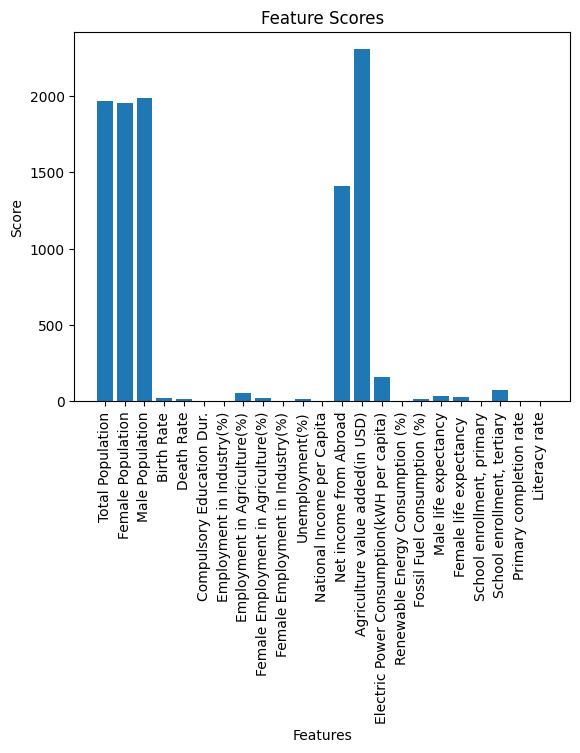

In [12]:
def select_features(X_train, y_train, X_test):

 fs = SelectKBest(score_func=f_regression, k=int(avg_col / 5))

 fs.fit(X_train, y_train)

 X_train_fs = fs.transform(X_train)

 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

feature_names = X_train.columns

plt.bar(range(len(fs.scores_)), fs.scores_)

plt.xticks(range(len(fs.scores_)), feature_names, rotation='vertical')

plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Scores')

plt.show()

So, Agriculture value added(in USD) is the first one.

In [13]:
mae_1 = {}
for i in X_train.columns:
    tree = DecisionTreeRegressor(random_state=23)
    tree.fit(X_train[[i]], y_train)
    
    # prediction
    y_pred = tree.predict(X_test[[i]])
    
    # compute the regression evaluation metric, e.g., Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    
    mae_1[i] = mae
best_skill = min(mae_1, key=mae_1.get)
print(f"Best Skill: {best_skill}")
print(f"MAE for Best Skill: {mae_1[best_skill]}")


Best Skill: Total Population
MAE for Best Skill: 117723661645.38664


Male population is the next feature.

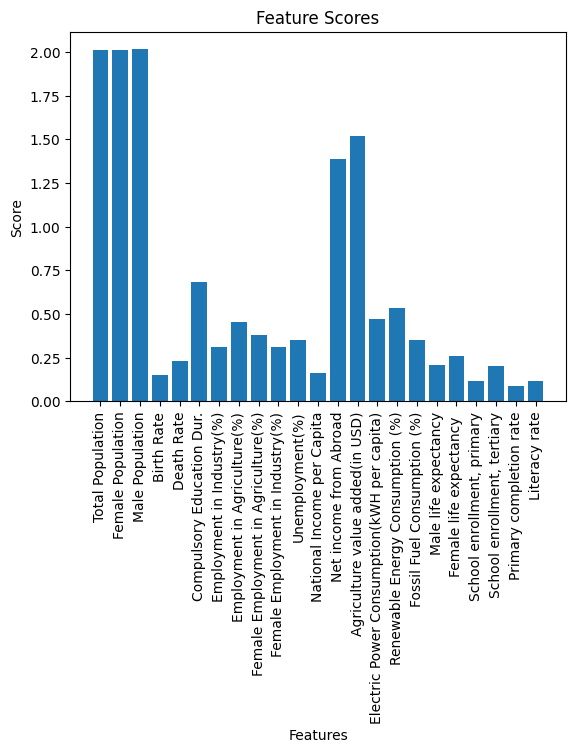

In [14]:
def select_features(X_train, y_train, X_test):

 fs = SelectKBest(score_func=mutual_info_regression, k=int(avg_mutual / 5))

 fs.fit(X_train, y_train)

 X_train_fs = fs.transform(X_train)

 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

feature_names = X_train.columns

plt.bar(range(len(fs.scores_)), fs.scores_)

plt.xticks(range(len(fs.scores_)), feature_names, rotation='vertical')

plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Scores')

plt.show()

Finally, Female Population is the last one.

### Model 2: We will choose some features based on the correlation in file 3.0-eda.ipynb

Based on heatmap, we will choose Agriculture value added(in USD) and Net income from Abroad

## Training model

In [15]:
# YOUR CODE HERE (OPTION) 
X_final_1_train = X_train[['Agriculture value added(in USD)', 'Male Population', 'Female Population']]
X_final_1_test = X_test[['Agriculture value added(in USD)', 'Male Population', 'Female Population']]

X_final_2_train = X_train[['Agriculture value added(in USD)', 'Net income from Abroad']]
X_final_2_test = X_test[['Agriculture value added(in USD)', 'Net income from Abroad']]

In [16]:
X_final_1_train.head()

,Agriculture value added(in USD),Male Population,Female Population
873,1.430583e+10,15666065.0,15939421.0
1010,2.369055e+08,302656.0,304409.0
590,5.115926e+07,61916.0,61747.0
129,6.060000e+07,128828.0,140649.0
414,1.388584e+09,2002605.0,1976588.0


In [17]:
X_final_2_train.head()

,Agriculture value added(in USD),Net income from Abroad
873,1.430583e+10,-9.708055e+09
1010,2.369055e+08,-4.657452e+08
590,5.115926e+07,-7.250452e+07
129,6.060000e+07,-1.750000e+08
414,1.388584e+09,-6.887646e+08


Model 1

In [18]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

model_ = LinearRegression()
model_.fit(X_final_1_train, y_train)

score_1 = cross_val_score(model_, X_final_1_train, y_train, scoring = "neg_mean_absolute_error", cv=kf)
print("Mean of this model: ", mean(absolute(score_1)))

Mean of this model:  570048930834.6562


Model 2

In [19]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

model_ = LinearRegression()
model_.fit(X_final_2_train, y_train)

score_1 = cross_val_score(model_, X_final_2_train, y_train, scoring = "neg_mean_absolute_error", cv=kf)
print("Mean of this model: ", mean(absolute(score_1)))

Mean of this model:  265575709180.93756


So we will choose model 2

## Evaluation

Re-training

In [20]:
# YOUR CODE HERE (OPTION) 
model_1 = LinearRegression()
model_1.fit(X_final_2_train, y_train)

print("coef: ", model_1.coef_)
print("intercept: ", model_1.intercept_)

coef:  [53.60473212 37.96430544]
intercept:  25955448733.0058


In [21]:
score_1 = cross_val_score(model_1, X_final_2_test, y_test, scoring = "neg_mean_absolute_error")
print("MAE of new model: ", mean(absolute(score_1)))

MAE of new model:  224737464356.25165


## Prediction

Thus,
$$\text{GDP (in USD)} = (53.60473212) * Agriculture value added(in USD) + (37.96430544) * Net income from Abroad \\
+ 25955448733.0058$$

==> Note that the coef and intercept may change due to the restart, this was my result.

In [22]:
# YOUR CODE HERE (OPTION) 

## Results analysis

Here is the MAE of the whole train set, which means we include all feature to the model. It can be seen as the avg MAE.

In [23]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

model_ = LinearRegression()
model_.fit(X_train, y_train)

score_1 = cross_val_score(model_, X_train, y_train, scoring = "neg_mean_absolute_error", cv=kf)
print("Mean of this model: ", mean(absolute(score_1)))

Mean of this model:  349249539352.2792


In [24]:
# YOUR CODE HERE (OPTION) 
y

0       1.757604e+09
1       1.560519e+09
2       1.416348e+09
3       1.675404e+09
4       1.604770e+09
            ...     
1199    5.000622e+11
1200    5.000622e+11
1201    5.000622e+11
1202    5.000622e+11
1203    5.000622e+11
Name: GDP in USD, Length: 1204, dtype: float64

Here, as we can see, MAE of this model is less than MAE of whole feature.

## Conclusion

**Your conclusion**

- We can combine various feature for training our model to predict a specific feature.
- By sorting feature's correlation, we can choose some weighty feature, thus, our precise is higher.
- There are many ways to combine features, such as square a feature, minute or sum a group of features, etc.
- Features choosing from numerous tools have MAE much more higher than in that of correlation simply because the features in this set did not aim to describe GDP, which means they are not complete related to GDP. Therefore, although some "Population" features show that it have a huge impact on our goal, it is NOT related that much.